In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# reading the CSV file with latin1 encoding
df = pd.read_csv('C:/Users/Owner/Downloads/forbes_richman.csv', encoding='latin1')

In [6]:
df

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.0,Elon Musk,$219 B,50.0,United States,"Tesla, SpaceX",Automotive
1,2.0,Jeff Bezos,$171 B,58.0,United States,Amazon,Technology
2,3.0,Bernard Arnault & family,$158 B,73.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,$129 B,66.0,United States,Microsoft,Technology
4,5.0,Warren Buffett,$118 B,91.0,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Step 1: Remove non-numeric characters from the 'Net Worth' column
df['Net Worth'] = df['Net Worth'].replace('[\$,B]', '', regex=True)

In [8]:
# Step 2: Convert the 'Net Worth' column to numeric format
df['Net Worth'] = pd.to_numeric(df['Net Worth'], errors='coerce')

In [9]:
df

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.0,Elon Musk,219.0,50.0,United States,"Tesla, SpaceX",Automotive
1,2.0,Jeff Bezos,171.0,58.0,United States,Amazon,Technology
2,3.0,Bernard Arnault & family,158.0,73.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,129.0,66.0,United States,Microsoft,Technology
4,5.0,Warren Buffett,118.0,91.0,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
avg_net_worth_by_country = df.groupby('Country')['Net Worth'].mean().sort_values(ascending=False)


In [11]:
# Display the result in a table
result_table = pd.DataFrame(avg_net_worth_by_country).reset_index()
result_table.columns = ['Country', 'Average Net Worth (Billion USD)']

print(result_table)

          Country  Average Net Worth (Billion USD)
0          France                        12.817500
1         Nigeria                         9.400000
2   United States                         6.562990
3         Ireland                         6.085714
4        Colombia                         6.025000
..            ...                              ...
69       Slovakia                         1.500000
70        Uruguay                         1.500000
71          Nepal                         1.500000
72        Hungary                         1.250000
73        Estonia                         1.200000

[74 rows x 2 columns]


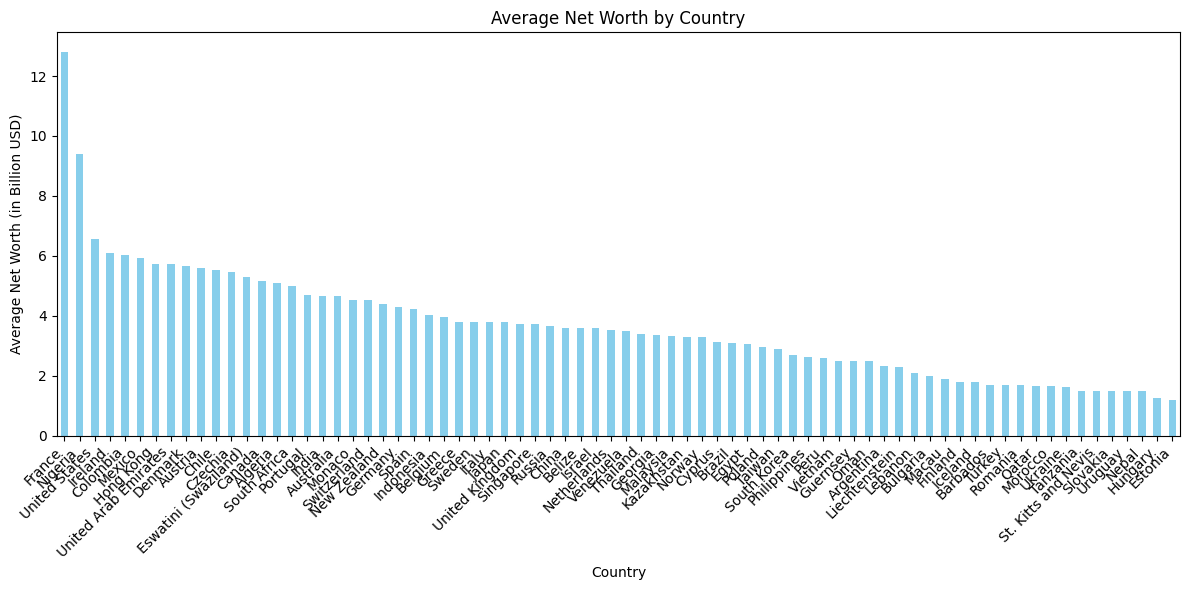

In [12]:
# Visualization
plt.figure(figsize=(12, 6))
avg_net_worth_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Net Worth by Country')
plt.xlabel('Country')
plt.ylabel('Average Net Worth (in Billion USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Count the number of billionaires in each country
billionaires_by_country = df['Country'].value_counts()

# Display the result in a table
billionaires_table = pd.DataFrame(billionaires_by_country).reset_index()
billionaires_table.columns = ['Country', 'Number of Billionaires']

print(billionaires_table)


                 Country  Number of Billionaires
0          United States                     689
1                  China                     509
2                  India                     156
3                Germany                     124
4                 Russia                      74
..                   ...                     ...
69             Venezuela                       1
70                Belize                       1
71              Portugal                       1
72  Eswatini (Swaziland)                       1
73               Estonia                       1

[74 rows x 2 columns]


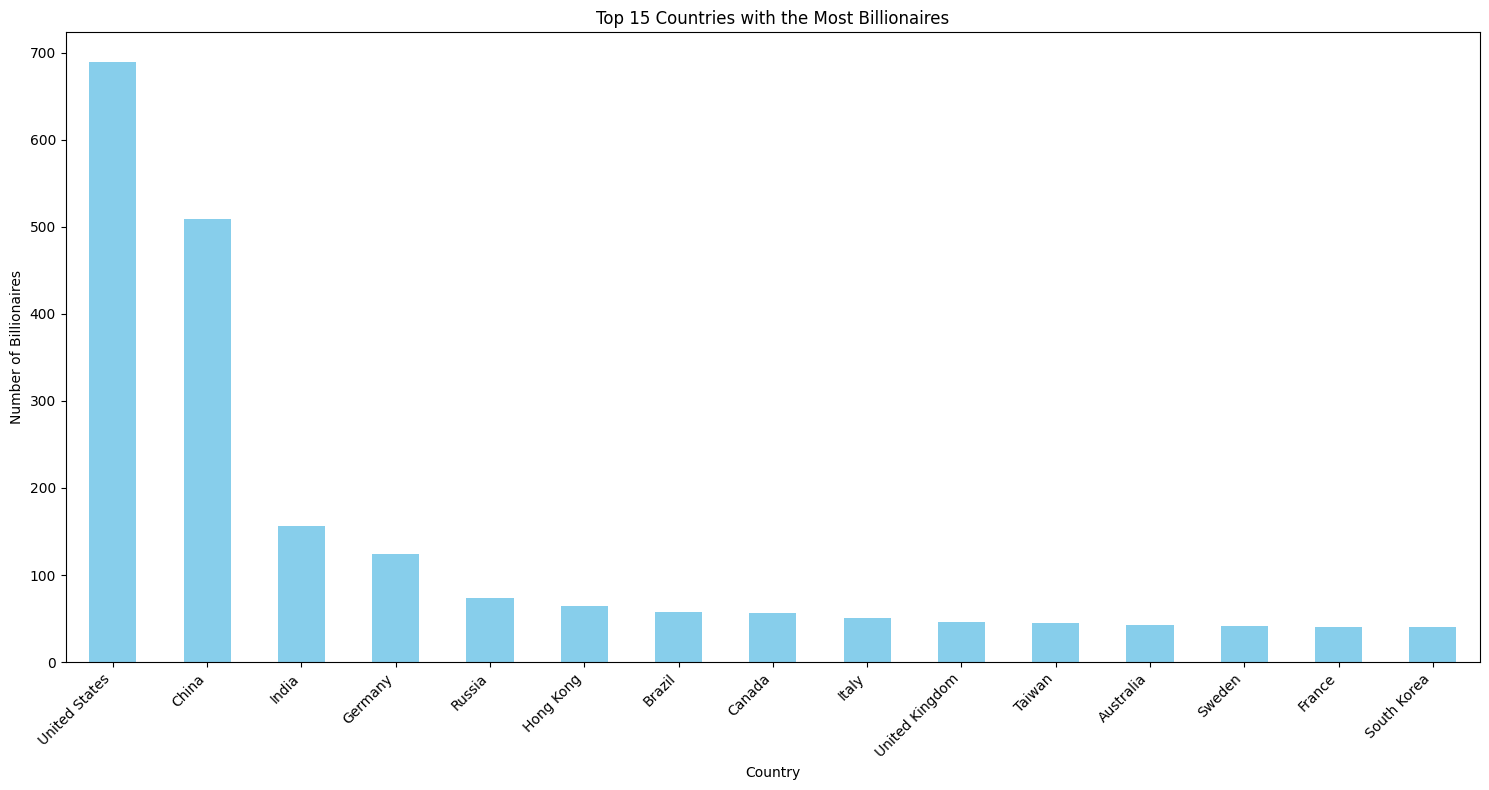

In [14]:
# Visualize the distribution
plt.figure(figsize=(15, 8))
billionaires_by_country[:15].plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries with the Most Billionaires')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
avg_net_worth_by_industry = df.groupby('Industry')['Net Worth'].mean().sort_values(ascending=False)

In [16]:
# Calculate the total number of billionaires in each industry
billionaires_count_by_industry = df['Industry'].value_counts().sort_values(ascending=False)

# Calculate total net worth by industry
total_net_worth_by_industry = df.groupby('Industry')['Net Worth'].sum().sort_values(ascending=False)

# Combine average net worth and total count into one df
industry_analysis = pd.DataFrame({
    'Average Net Worth (Billion USD)': avg_net_worth_by_industry,
    'Total Billionaires Count': billionaires_count_by_industry,
    'Total Net Worth (Billion USD)': total_net_worth_by_industry
}).reset_index()

# Print combined results
print(industry_analysis)


                      Industry  Average Net Worth (Billion USD)  \
0                   Automotive                         8.516418   
1   Construction & Engineering                         2.713953   
2                  Diversified                         5.144706   
3                       Energy                         4.008140   
4             Fashion & Retail                         6.382906   
5        Finance & Investments                         4.500546   
6              Food & Beverage                         4.703403   
7           Gambling & Casinos                         4.678261   
8                   Healthcare                         3.210294   
9                    Logistics                         5.956250   
10               Manufacturing                         3.238390   
11       Media & Entertainment                         5.185567   
12             Metals & Mining                         5.851562   
13                 Real Estate                         3.57288

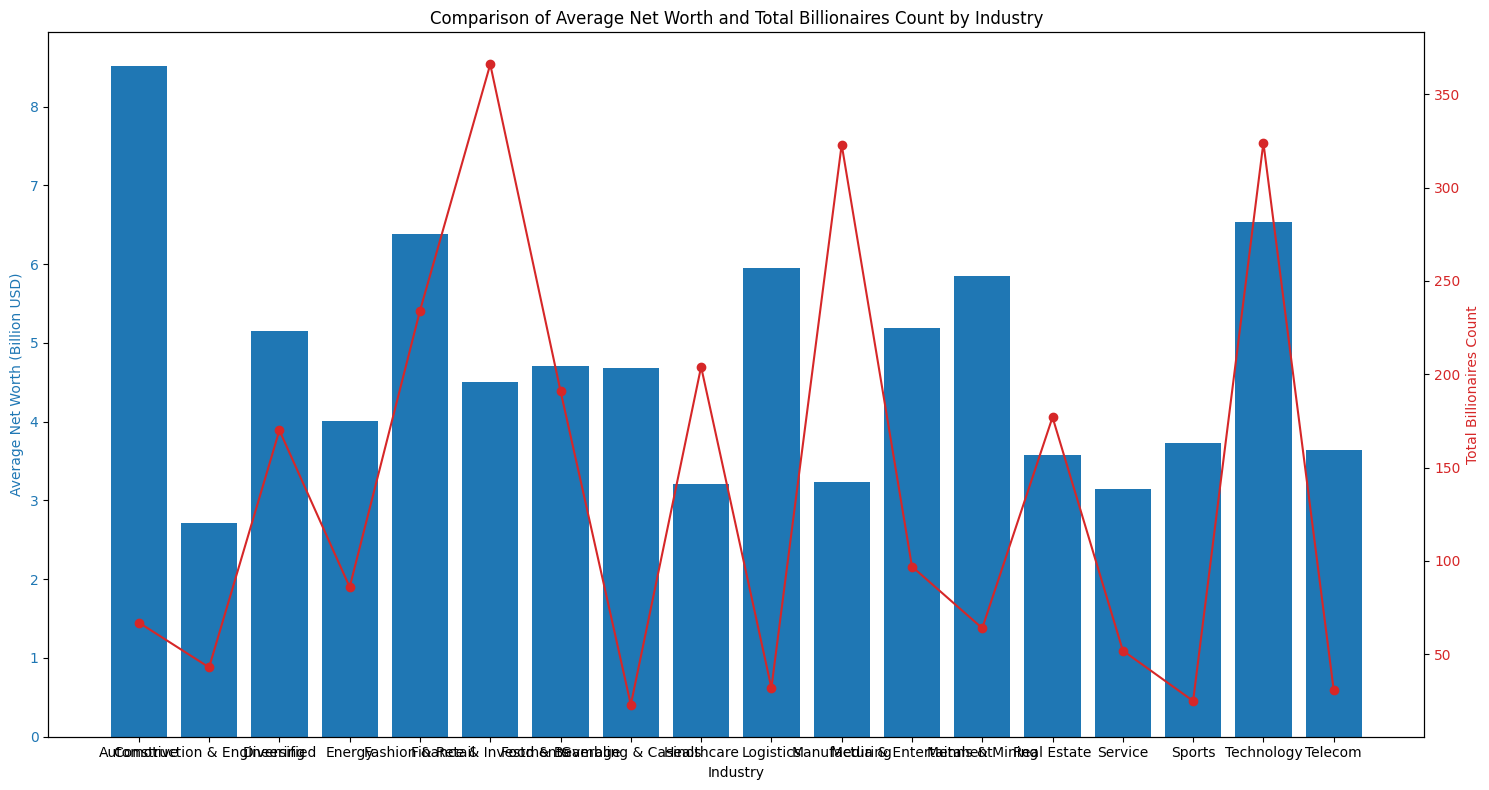

In [17]:
# Visualize the distribution
fig, ax1 = plt.subplots(figsize=(15, 8))

# Barchart  for Average Net Worth
color = 'tab:blue'
ax1.set_xlabel('Industry')
ax1.set_ylabel('Average Net Worth (Billion USD)', color=color)
ax1.bar(industry_analysis['Industry'], industry_analysis['Average Net Worth (Billion USD)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Total Billionaires Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Billionaires Count', color=color)
ax2.plot(industry_analysis['Industry'], industry_analysis['Total Billionaires Count'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.title('Comparison of Average Net Worth and Total Billionaires Count by Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
print("Number of missing values in 'Age' column:", df['Age'].isnull().sum())

Number of missing values in 'Age' column: 202


In [19]:
# Drop rows with missing values in 'Age'
df.dropna(subset=['Age'], inplace=True)

In [20]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import seaborn as sns

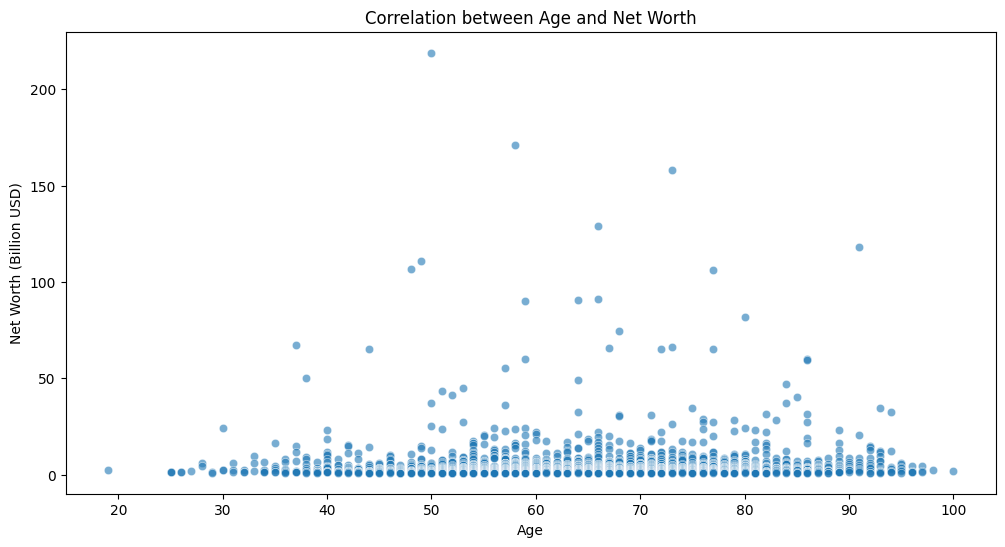

Correlation Coefficient between Age and Net Worth: 0.03491485919159451


In [23]:
# Step 5: Visualize the correlation between age and net worth
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Net Worth', data=df, alpha=0.6)
plt.title('Correlation between Age and Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth (Billion USD)')
plt.show()

# Step 6: Calculate correlation coefficient
correlation_coefficient = df['Age'].corr(df['Net Worth'])
print(f"Correlation Coefficient between Age and Net Worth: {correlation_coefficient}")

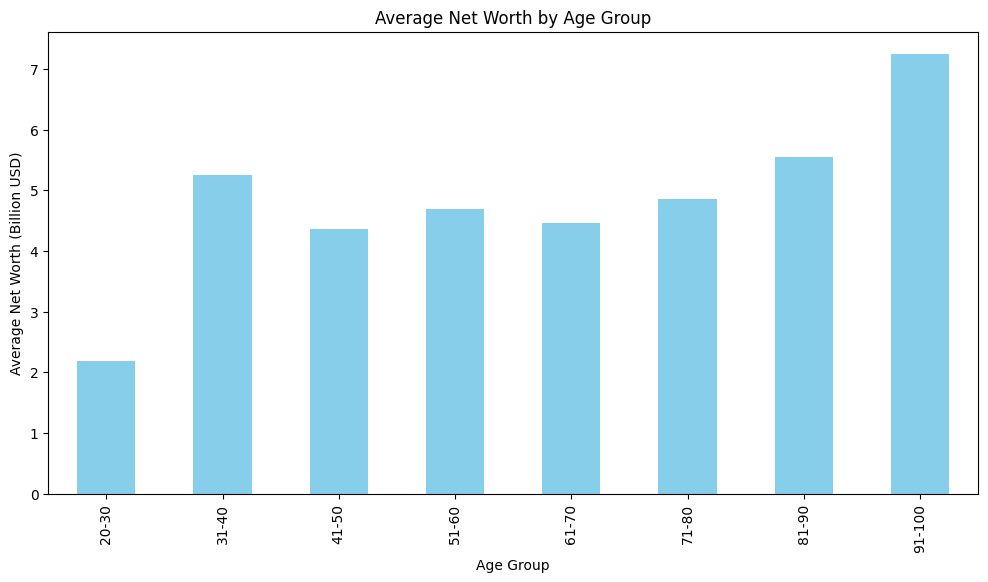

In [24]:
# Create age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average net worth by age group
avg_net_worth_by_age_group = df.groupby('Age Group')['Net Worth'].mean()

# Visualize the results
plt.figure(figsize=(12, 6))
avg_net_worth_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Net Worth by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Net Worth (Billion USD)')
plt.show()

In [25]:
# Display the average net worth by age group in a table
age_group_table = pd.DataFrame(avg_net_worth_by_age_group).reset_index()
age_group_table.columns = ['Age Group', 'Average Net Worth (Billion USD)']
print(age_group_table)

  Age Group  Average Net Worth (Billion USD)
0     20-30                         2.180000
1     31-40                         5.258824
2     41-50                         4.369869
3     51-60                         4.687599
4     61-70                         4.454516
5     71-80                         4.849907
6     81-90                         5.556818
7    91-100                         7.250746


In [26]:
# Count the number of billionaires in each age group
billionaires_count_by_age_group = df.groupby('Age Group')['Net Worth'].count()

# Display the number of billionaires by age group in a table
age_group_billionaires_table = pd.DataFrame(billionaires_count_by_age_group).reset_index()
age_group_billionaires_table.columns = ['Age Group', 'Number of Billionaires']
print(age_group_billionaires_table)

  Age Group  Number of Billionaires
0     20-30                      10
1     31-40                      68
2     41-50                     229
3     51-60                     633
4     61-70                     620
5     71-80                     537
6     81-90                     264
7    91-100                      67


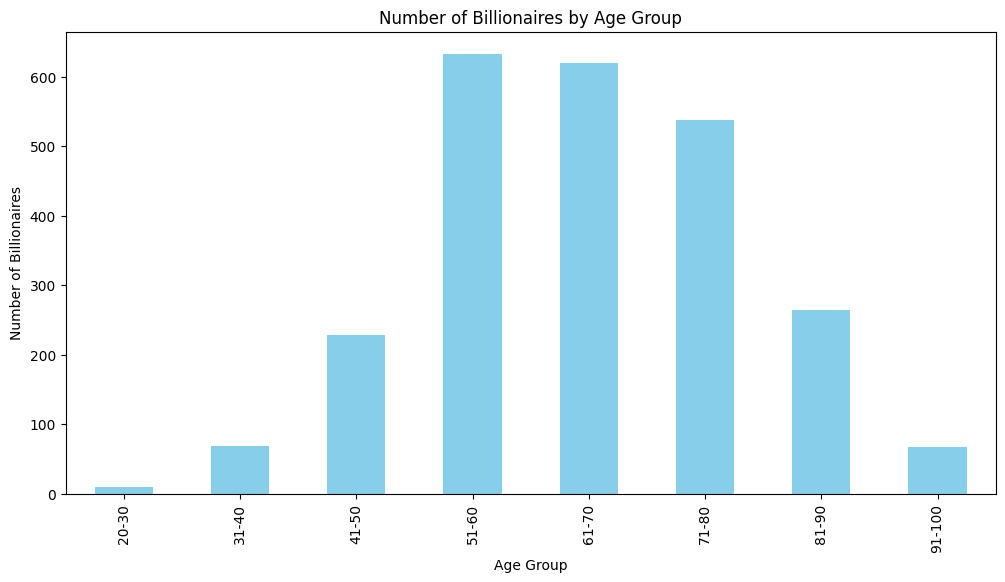

In [27]:
# Visualize the number of billionaires by age group
plt.figure(figsize=(12, 6))
billionaires_count_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Number of Billionaires by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Billionaires')
plt.show()


In [28]:
# Explore and clean the 'Source' column
# Check for missing values
print("Number of missing values in 'Source' column:", df['Source'].isnull().sum())

Number of missing values in 'Source' column: 0


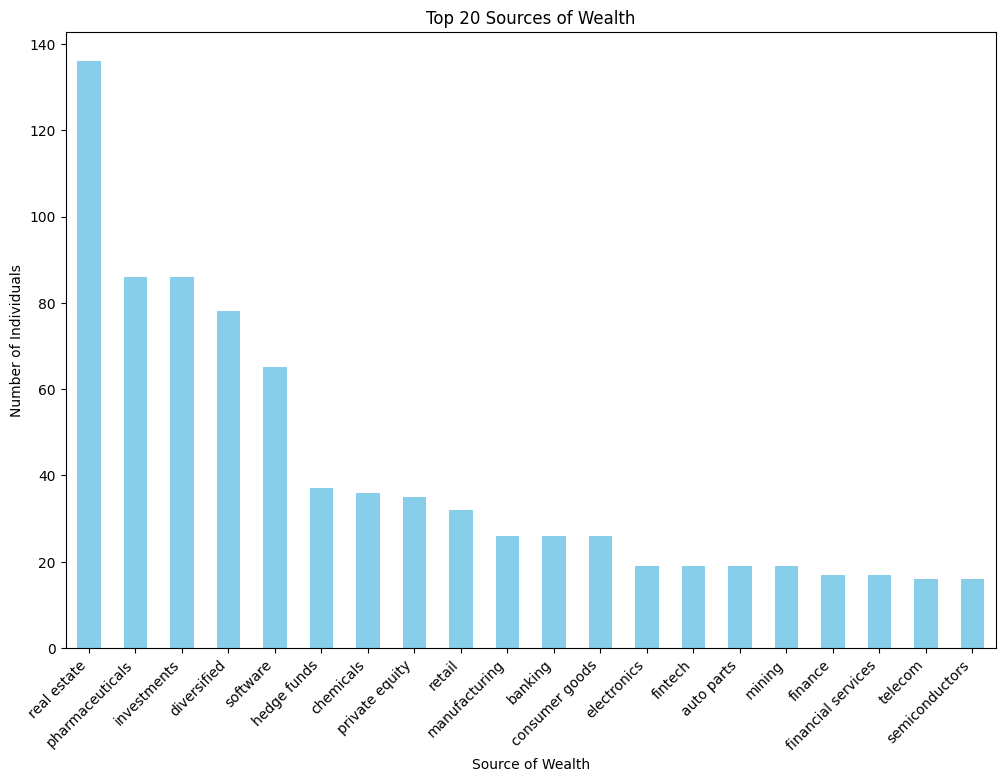

In [29]:
# Step 4: Visualize the distribution of sources of wealth
plt.figure(figsize=(12, 8))
df['Source'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Sources of Wealth')
plt.xlabel('Source of Wealth')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
top_sources_table = df['Source'].value_counts().head(20).reset_index()
top_sources_table.columns = ['Source of Wealth', 'Number of Individuals']
print(top_sources_table)

      Source of Wealth  Number of Individuals
0          real estate                    136
1      pharmaceuticals                     86
2          investments                     86
3          diversified                     78
4             software                     65
5          hedge funds                     37
6            chemicals                     36
7       private equity                     35
8               retail                     32
9        manufacturing                     26
10             banking                     26
11      consumer goods                     26
12         electronics                     19
13             fintech                     19
14          auto parts                     19
15              mining                     19
16             finance                     17
17  financial services                     17
18             telecom                     16
19      semiconductors                     16


In [31]:
# Check for missing values
print("Number of missing values in 'Country' column:", df['Country'].isnull().sum())

Number of missing values in 'Country' column: 0


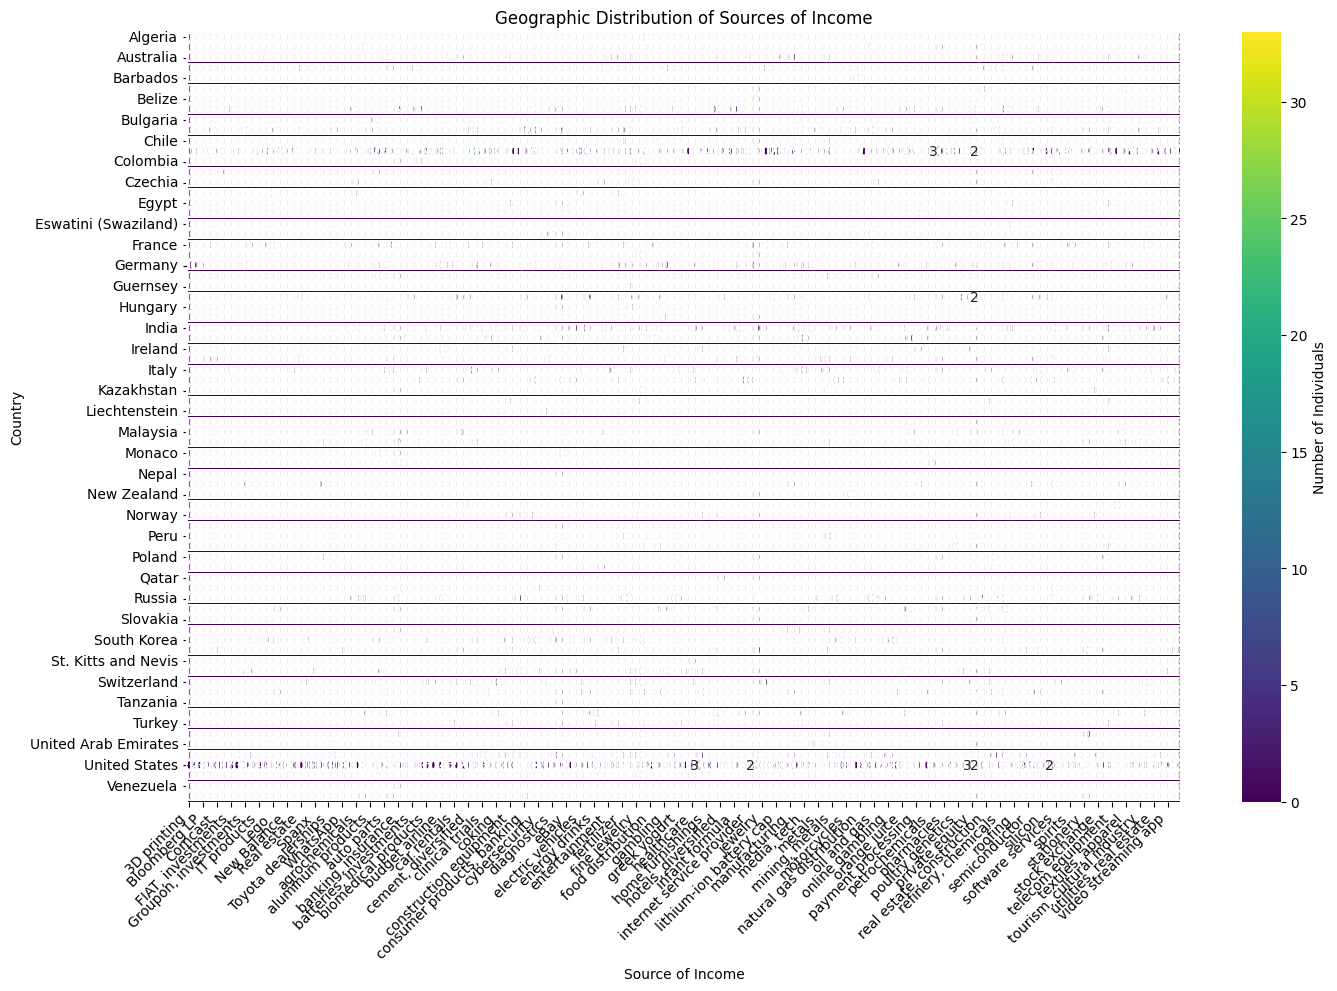

In [32]:
# Create a heatmap for geographic distribution of sources of income
heatmap_data = df.groupby(['Country', 'Source']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Individuals'})
plt.title('Geographic Distribution of Sources of Income')
plt.xlabel('Source of Income')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Create a table for geographic distribution of sources of income
geographic_distribution_table = df.groupby(['Country', 'Source']).size().unstack(fill_value=0).reset_index()
geographic_distribution_table = geographic_distribution_table.melt(id_vars=['Country'], var_name='Source of Income', value_name='Number of Individuals')
geographic_distribution_table = geographic_distribution_table.sort_values(by=['Country', 'Number of Individuals'], ascending=[True, False])

# Display the table
print(geographic_distribution_table)

       Country          Source of Income  Number of Individuals
29008  Algeria                      food                      1
0      Algeria               3D printing                      0
74     Algeria                       AOL                      0
148    Algeria                    Airbnb                      0
222    Algeria        Aldi, Trader Joe's                      0
...        ...                       ...                    ...
62677  Vietnam           wedding dresses                      0
62751  Vietnam                      wine                      0
62825  Vietnam            winter jackets                      0
62899  Vietnam     wire & cables, paints                      0
62973  Vietnam  wireless networking gear                      0

[62974 rows x 3 columns]


In [34]:
# Find the major source of wealth generation for each country
major_source_by_country = df.groupby('Country')['Source'].agg(lambda x: x.value_counts().idxmax() if not x.empty else None).reset_index()
major_source_by_country.columns = ['Country', 'Major Source of Wealth']

# Display the table
print(major_source_by_country)

           Country      Major Source of Wealth
0          Algeria                        food
1        Argentina                   oil & gas
2        Australia                      mining
3          Austria                    Red Bull
4         Barbados            music, cosmetics
..             ...                         ...
69  United Kingdom                   chemicals
70   United States                 hedge funds
71         Uruguay                     fintech
72       Venezuela                     banking
73         Vietnam  consumer products, banking

[74 rows x 2 columns]


In [35]:
# Find the source of income with the highest number of billionaires for the United States
us_sources = df[df['Country'] == 'United States']['Source'].value_counts().reset_index()
us_sources.columns = ['Source of Income', 'Number of Billionaires']

# Display the table
print(us_sources)

             Source of Income  Number of Billionaires
0                 hedge funds                      32
1              private equity                      31
2                 investments                      28
3                 real estate                      28
4                    software                      25
..                        ...                     ...
319               web hosting                       1
320  timberland, lumber mills                       1
321                    coffee                       1
322     Netscape, investments                       1
323      banking, sports team                       1

[324 rows x 2 columns]


In [37]:
# Find the major source of wealth generation for each country along with the number of billionaires
major_source_and_count_by_country = df.groupby('Country')['Source'].agg(lambda x: (x.value_counts().idxmax(), x.value_counts().max()) if not x.empty else (None, 0)).reset_index()
major_source_and_count_by_country.columns = ['Country', 'Major Source of Wealth']

# Add a new column for the number of billionaires
major_source_and_count_by_country['Number of Billionaires'] = major_source_and_count_by_country.apply(lambda row: row['Major Source of Wealth'][1], axis=1)

# Remove the number of billionaires from the 'Major Source of Wealth' column
major_source_and_count_by_country['Major Source of Wealth'] = major_source_and_count_by_country['Major Source of Wealth'].apply(lambda x: x[0] if x else None)

# Display the table
print(major_source_and_count_by_country)


           Country      Major Source of Wealth  Number of Billionaires
0          Algeria                        food                       1
1        Argentina                   oil & gas                       2
2        Australia                      mining                       7
3          Austria                    Red Bull                       1
4         Barbados            music, cosmetics                       1
..             ...                         ...                     ...
69  United Kingdom                   chemicals                       3
70   United States                 hedge funds                      32
71         Uruguay                     fintech                       2
72       Venezuela                     banking                       1
73         Vietnam  consumer products, banking                       2

[74 rows x 3 columns]


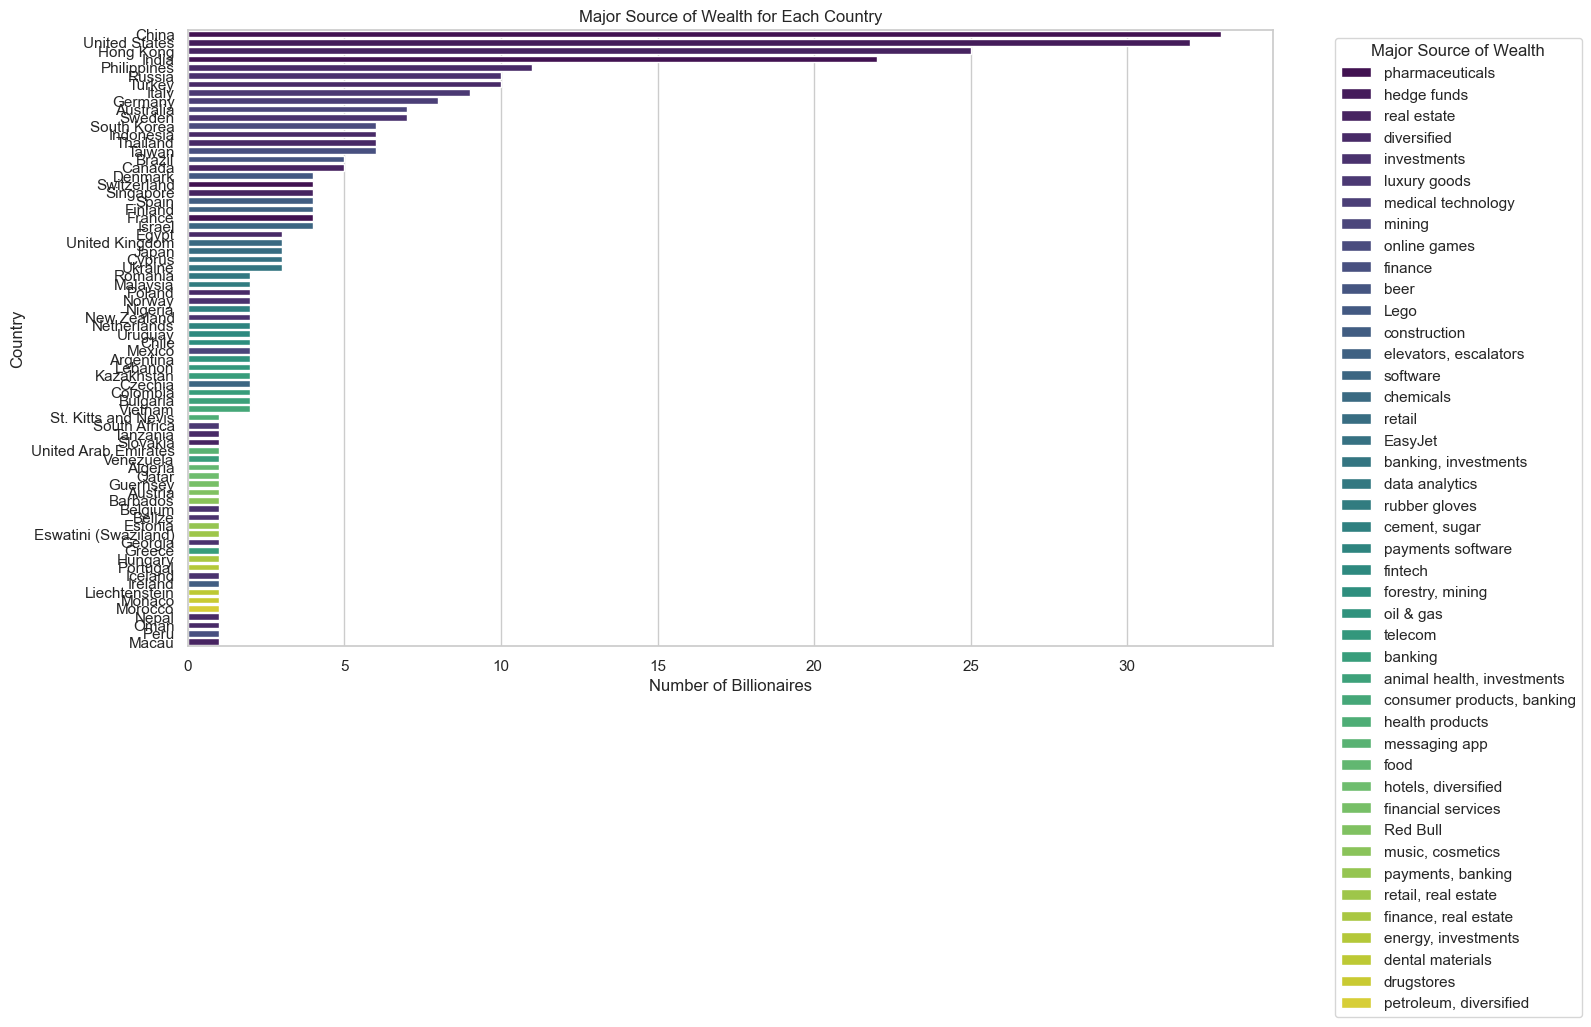

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Billionaires', y='Country', hue='Major Source of Wealth', data=major_source_and_count_by_country.sort_values(by='Number of Billionaires', ascending=False), palette='viridis')
plt.title('Major Source of Wealth for Each Country')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.legend(title='Major Source of Wealth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [39]:
# Analyze representation of companies in the top 100 list
top_companies = df['Source'].value_counts().head(10)  # Assuming we want to focus on the top 10 companies
top_companies = top_companies.reset_index()
top_companies.columns = ['Company', 'Number of Billionaires']

# Display the top companies table
print(top_companies)


           Company  Number of Billionaires
0      real estate                     138
1      investments                      89
2  pharmaceuticals                      88
3      diversified                      81
4         software                      66
5      hedge funds                      37
6        chemicals                      37
7   private equity                      35
8           retail                      33
9          banking                      27


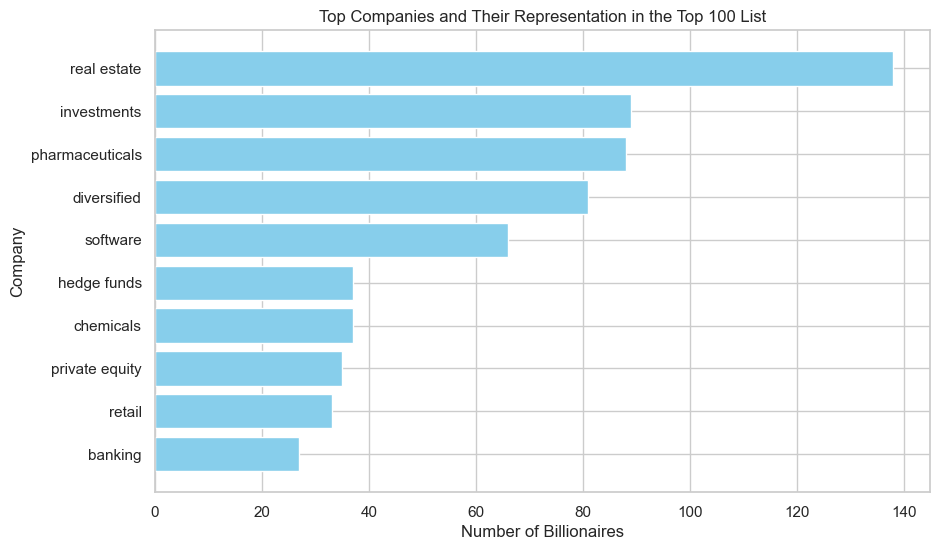

In [40]:
# Plotting the top companies
plt.figure(figsize=(10, 6))
plt.barh(top_companies['Company'], top_companies['Number of Billionaires'], color='skyblue')
plt.xlabel('Number of Billionaires')
plt.ylabel('Company')
plt.title('Top Companies and Their Representation in the Top 100 List')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

Number of billionaires in the technology sector: 196
Percentage of billionaires in the technology sector: 7.45%


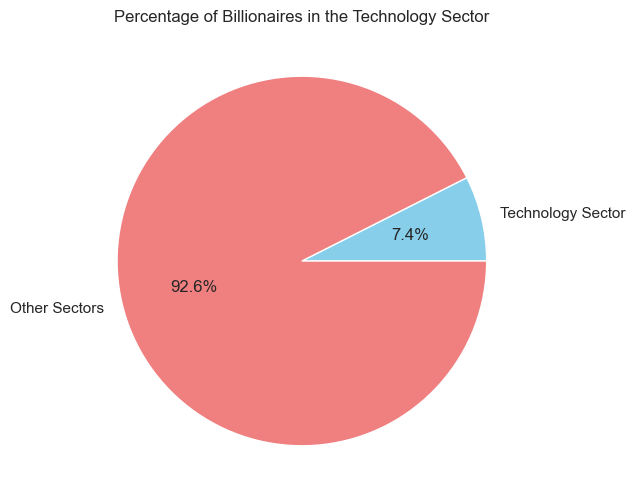

In [43]:
if 'Source' in df.columns:
    # Filter data for billionaires in the technology sector
    tech_billionaires = df[df['Source'].str.contains('technology|tech|IT', case=False, na=False)]
    
    # Count the number of billionaires in the technology sector
    num_tech_billionaires = len(tech_billionaires)
    
    # Calculate the percentage of billionaires in the technology sector
    total_billionaires = len(df)
    percentage_tech_billionaires = (num_tech_billionaires / total_billionaires) * 100
    
    # Display the results
    print(f"Number of billionaires in the technology sector: {num_tech_billionaires}")
    print(f"Percentage of billionaires in the technology sector: {percentage_tech_billionaires:.2f}%")
    
    # Visualization
    plt.figure(figsize=(6, 6))
    plt.pie([num_tech_billionaires, total_billionaires - num_tech_billionaires], labels=['Technology Sector', 'Other Sectors'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Percentage of Billionaires in the Technology Sector')
    plt.show()
else:
    print("The 'Source' column does not exist in the DataFrame.")


Number of billionaires in each specified sector:
Source
real estate        138
investments         89
pharmaceuticals     88
software            66
hedge funds         37
retail              33
manufacturing       26
Manufacturing        7
Real estate          3
Real Estate          2
Investments          2
Name: count, dtype: int64

Percentage of billionaires in each specified sector:
Source
real estate        28.105906
investments        18.126273
pharmaceuticals    17.922607
software           13.441955
hedge funds         7.535642
retail              6.720978
manufacturing       5.295316
Manufacturing       1.425662
Real estate         0.610998
Real Estate         0.407332
Investments         0.407332
Name: count, dtype: float64


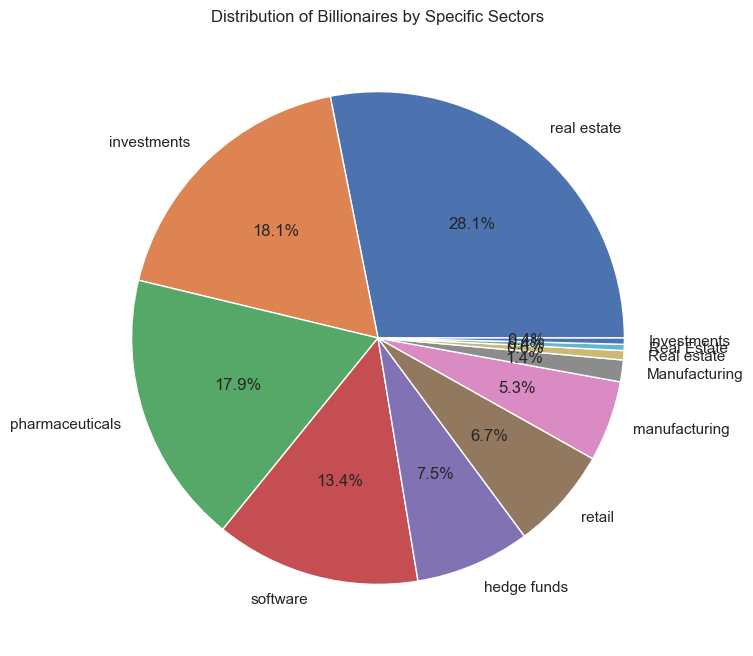

In [45]:
specific_sectors = ['real estate', 'pharmaceuticals', 'investments', 'software', 'hedge funds', 'manufacturing', 'retail']

# Filter data for billionaires in the specified sectors
specific_sector_billionaires = df[df['Source'].str.lower().isin(specific_sectors)]

# Count the number of billionaires in each specified sector
num_sector_billionaires = specific_sector_billionaires['Source'].value_counts()

# Calculate the total number of billionaires in the specified sectors
total_specific_billionaires = num_sector_billionaires.sum()

# Calculate the percentage of billionaires in each specified sector
percentage_sector_billionaires = (num_sector_billionaires / total_specific_billionaires) * 100

# Display the results
print("Number of billionaires in each specified sector:")
print(num_sector_billionaires)
print("\nPercentage of billionaires in each specified sector:")
print(percentage_sector_billionaires)

# Visualization (Pie chart)
plt.figure(figsize=(8, 8))
plt.pie(percentage_sector_billionaires, labels=num_sector_billionaires.index, autopct='%1.1f%%')
plt.title('Distribution of Billionaires by Specific Sectors')
plt.show()
